## 0. Importing external modules

In [2]:
## path for mdules

import sys
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/xscale")
import xscale

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/powerspec/powerspec")
import powerspec as pp

In [4]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/diags-CMEMS-on-occigen/Vorticity_Variance/")
import GriddedData
import WavenumberSpectrum as ws


In [5]:
## imports

import numpy as np
import xarray as xr
import time

In [6]:
#- Other modules
import numpy.ma as ma

### palette
import matplotlib.cm as mplcm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import matplotlib.pyplot as plt

import glob
import os 

%matplotlib inline

In [7]:
config='NATL60'
case='CJM165'
freq='1d'
region='GS'

year='2013'
month='03'
date_list=[]
for day in np.arange(1,32):
    if day < 10:
        date='y'+str(year)+'m'+str(month)+'d0'+str(day)
    else:
        date='y'+str(year)+'m'+str(month)+'d'+str(day)
    date_list.append(date)


In [8]:
if region == 'EU':
    imin=3858
    imax=5076
    jmin=424
    jmax=3286
    
#cdffindij -w -80.418  -40.000   26.991   47.986 -c /store/molines/NATL60/NATL60-I/NATL60_coordinates_v4.nc
if region == 'GS':
    imin=63
    imax=2507
    jmin=29
    jmax=1611

In [9]:
## Dataset

gridfile='/store/molines/NATL60/NATL60-I/NATL60_coordinates_v4.nc'
maskfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
meshhgrfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_hgr.nc'
meshzgrfile='/store/molines/NATL60/NATL60-I/NATL60_v4.1_cdf_mesh_zgr.nc'

In [10]:
grid=xr.open_dataset(gridfile)
navlat= grid['nav_lat'][jmin:jmax,imin:imax]
navlon= grid['nav_lon'][jmin:jmax,imin:imax]


In [11]:
navlat

<xarray.DataArray 'nav_lat' (y: 1582, x: 2444)>
[3866408 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    units:      degrees_north
    valid_min:  26.41709
    valid_max:  67.481155
    long_name:  Latitude

In [12]:
datadir='/store/molines/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'
for date in date_list:
    fileU=datadir+'*/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_gridU.nc'
    fileV=datadir+'*/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_gridV.nc'
    filecurl='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_'+str(date)+'.'+str(freq)+'_socurloverf.nc'
    if not os.path.exists(filecurl):
        print('Computing '+str(filecurl))
        !ln -sf $meshhgrfile mesh_hgr.nc
        !ln -sf $meshzgrfile mesh_zgr.nc
        !ulimit -s unlimited; cdfcurl -u $fileU vozocrtx -v $fileV vomecrty -l 1 -surf -overf -o $filecurl
        !rm mesh*

In [13]:
filescurl='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_y'+str(year)+'m'+str(month)+'d??.'+str(freq)+'_socurloverf.nc'
!ls $filescurl

/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d01.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d02.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d03.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d04.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d05.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d06.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d07.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d08.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d09.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d10.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d11.1d_socurloverf.nc
/scratch/cnt0024/hmg2840/albert7a/tmp/NATL60-CJM165_y2013m03d12.1d_socurloverf.nc
/scratch/cnt0024

In [14]:
dscurl=xr.open_mfdataset(filescurl,chunks={'time_counter':1,'y':700,'x':1000})

In [15]:
curl=dscurl.socurloverf[:,jmin:jmax,imin:imax]

In [16]:
curl

<xarray.DataArray 'socurloverf' (time_counter: 31, y: 1582, x: 2444)>
dask.array<shape=(31, 1582, 2444), dtype=float32, chunksize=(1, 671, 937)>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2013-03-01T12:00:00 ... 2013-03-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             -
    valid_min:         -1000.0
    valid_max:         1000.0
    long_name:         Relative_Vorticity (curl)
    short_name:        socurl
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

In [17]:
def filt(w):
    win_box2D = w.window
    win_box2D.set(window='hanning', cutoff=20, dim=['x', 'y'], n=[30, 30])
    bw = win_box2D.boundary_weights(drop_dims=[])
    w_LS = win_box2D.convolve(weights=bw)
    w_SS=w-w_LS
    return w_SS


In [18]:
curl_SS=filt(curl)
curl_LS=curl-curl_SS

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


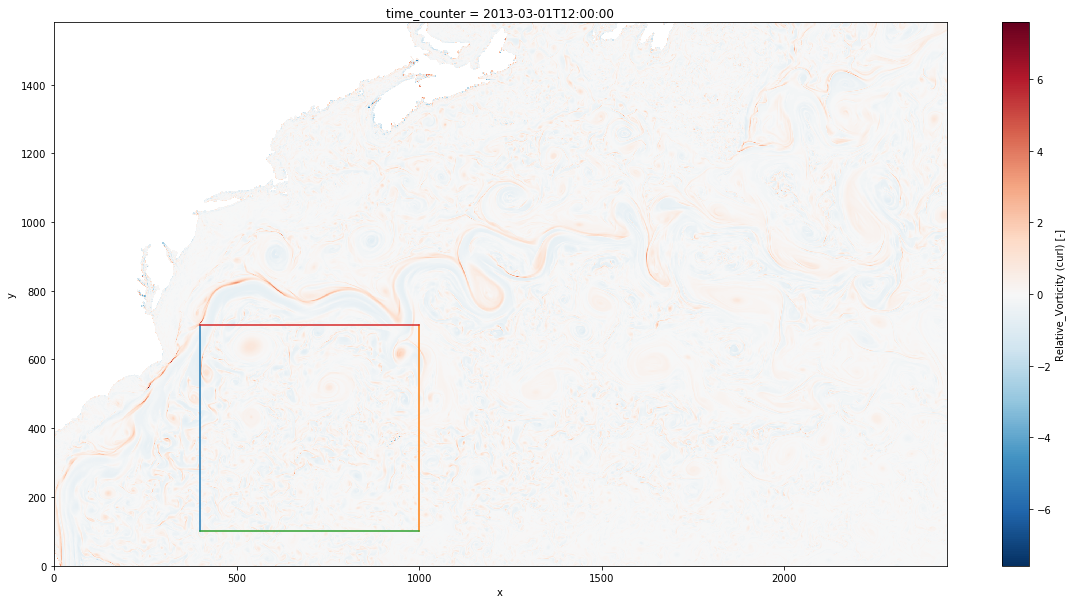

In [19]:
fig=plt.figure(figsize=(20,10))
ax = plt.subplot(111)
curl[0].plot()

ax.plot([400, 400], [100, 700])
ax.plot([1000, 1000], [100, 700])
ax.plot([400, 1000], [100, 100])
ax.plot([400, 1000], [700, 700])


In [20]:
zlat= navlat[100:700,400:1000].values
zlon= navlon[100:700,400:1000].values
zfull = curl[0,100:700,400:1000].values
zhp = curl_SS[0,100:700,400:1000].values
zlp = zfull - zhp

In [21]:
zfull

array([[-0.3129117 , -0.4550432 , -0.48733938, ..., -0.0663489 ,
        -0.0400406 , -0.02021108],
       [-0.12493175, -0.36114988, -0.41823137, ..., -0.10691477,
        -0.08818631, -0.06584224],
       [ 0.09634958, -0.19043556, -0.30102018, ..., -0.11255008,
        -0.10997507, -0.10166588],
       ...,
       [ 0.0971162 ,  0.16383862,  0.17270832, ..., -0.00078348,
        -0.00890406, -0.05478275],
       [-0.0270173 ,  0.09280345,  0.16070132, ..., -0.00582543,
        -0.01874625, -0.06549241],
       [-0.13664953, -0.03047483,  0.09358136, ..., -0.01262235,
        -0.02854843, -0.07216541]], dtype=float32)

In [22]:
def compute_spectrum(var):
    data = var.squeeze()
    pspec,kstep = pp.wavenumber_spectra(data,zlon,zlat)
    return pspec, kstep

%time spectre_full = compute_spectrum(zfull)
%time spectre_hp   = compute_spectrum(zhp)
%time spectre_lp   = compute_spectrum(zlp)


CPU times: user 2.9 s, sys: 4.42 s, total: 7.32 s
Wall time: 445 ms
CPU times: user 2.29 s, sys: 3.09 s, total: 5.38 s
Wall time: 378 ms
CPU times: user 2.09 s, sys: 2.97 s, total: 5.06 s
Wall time: 350 ms


In [23]:
rad2cyc = 1.E3 / np.pi / 2. 

def nice_spectrum(spectre_full,spectre_hp,spectre_lp,title,figname):
    fig, axarr = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    #
    pspec,kstep = spectre_full
    pspec_lp,kstep_lp = spectre_lp
    pspec_hp,kstep_hp = spectre_hp
    skpspec = pspec * rad2cyc
    skpspec_lp = pspec_lp * rad2cyc
    skpspec_hp = pspec_hp * rad2cyc
    axarr.plot(skpspec[1:],kstep[1:], 'k-', lw=3, label='Full relative vorticity')
#    axarr.plot(skpspec_lp[1:],kstep_lp[1:], 'r-', lw=3, label='Low passed relative vorticity f=0.0125 n=80')
    axarr.plot(skpspec_hp[1:],kstep_hp[1:], 'b-', lw=3, label='Full - Low passed'+title)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_title('',fontsize=20)
    axarr.grid(True,which='both',ls='-')
    axarr.axis('tight')
    axarr.legend(loc="lower left", fontsize=25)
    axarr.tick_params(labelsize=25)
#    plt.title(title, fontsize=25)
    plt.savefig(figname)



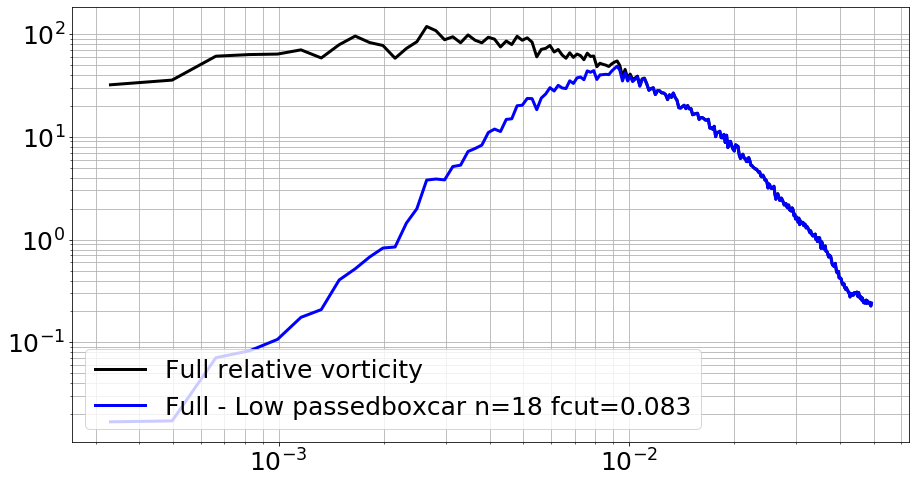

In [24]:
nice_spectrum(spectre_full,spectre_hp,spectre_lp,'boxcar n=18 fcut=0.083',config+'-'+case+'_spectrum_filt.png')


In [25]:
hpcurl=curl_SS
hpcurl2 = hpcurl ** 2
hpcurl2m = hpcurl2.mean(axis=0,keep_attrs=True)
navlat2=np.array(navlat).squeeze()
navlon2=np.array(navlon).squeeze()


In [26]:
mgrd = GriddedData.grid2D(navlat=navlat2, navlon=navlon2)

In [27]:
mgrd.shape

(1582, 2444)

In [28]:
crs = GriddedData.grdCoarsener(mgrd,crs_factor=60)

In [29]:
hpcurl2mc = crs.return_ravel(np.asarray(hpcurl2m))

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [30]:
hpcurl2mcm = np.mean(hpcurl2mc,axis=-3)

In [31]:
latcrs=crs.return_ravel(np.asarray(navlat2))
loncrs=crs.return_ravel(np.asarray(navlon2))
latcrsm=np.mean(latcrs,axis=-3)
loncrsm=np.mean(loncrs,axis=-3)

In [32]:
def plot_fine_scale_variance(var,loncrs,latcrs,lon,lat,hpvarm,month):
    ''' map of the averaged fine scale variance
    '''
    fig = plt.figure(figsize=(15,11))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.autoscale(tight=True)
    cont=np.isnan(hpvarm)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 25, 'color': 'gray'}
    gl.ylabel_style = {'size': 25, 'color': 'gray'}
    
    ax.tick_params('both',labelsize=25)

    pcolor = ax.pcolormesh(loncrs,latcrs,ma.masked_invalid(var),cmap=seq_cmap,vmin=0,vmax=0.1,alpha=1)
    ax.contour(lon,lat,cont,alpha=0.5,linewidth=0.000001,antialiased=True,colors='black')
    cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
    cbar.ax.tick_params(labelsize=35)
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label('Small scales surface vorticity variance in '+month,fontsize=25)
    plt.savefig('fine_scale_variance_vorticity_NATL60-CJM165_'+month+'.png')
  

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


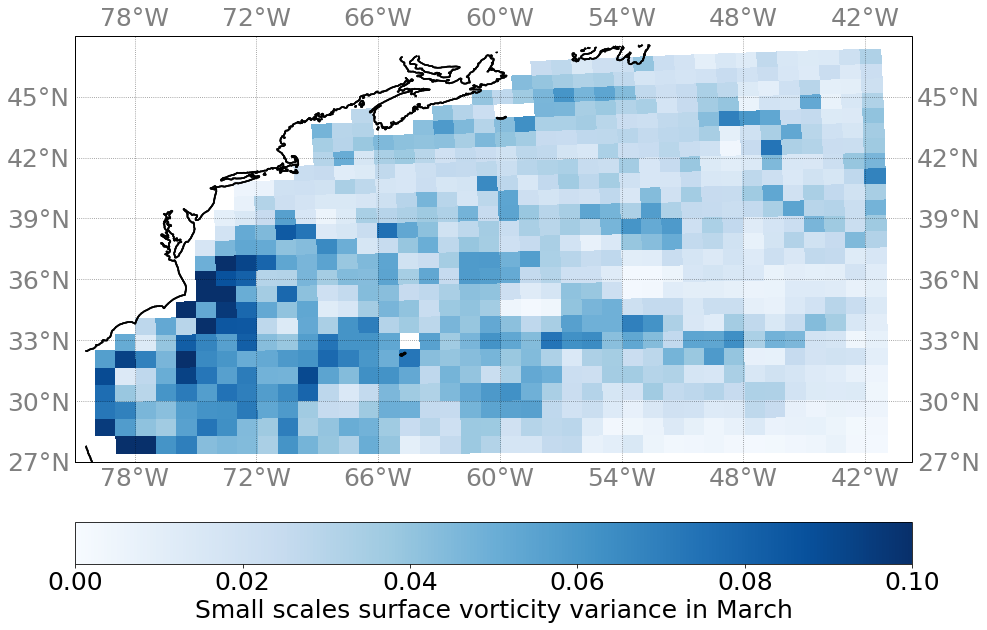

In [33]:
plot_fine_scale_variance(hpcurl2mcm,loncrsm, latcrsm,navlon,navlat,hpcurl2m,'March')